# Propositional Knowledge Base

Let there be a system with three variables:
- "Wet" : Observation, that the street is wet.
- "Rained" : It has rained.
- "Sprinkler" : The sprinkler has been on.

There are logical sentences describing this system:
- Sentence 1: Whenever it has rained, the street is wet.
- Sentence 2: Whenever the sprinkler has been on, the street is wet.
- Sentence 3: Whenever the street is wet, is has rained or the sprinkler has been on.

In [2]:
# Represent the logic by logical sentences
sen1 = ["imp","Rained","Wet"]   # if it rained it implies that it is wet
sen2 = ["imp","Sprinkler","Wet"]    # if the sprinkler was on it implies that it is wet
sen3 = ["imp","Wet",["or","Sprinkler","Rained"]] # if it is wet, it rained or the sprinkler was on

In [3]:
from tnreason import knowledge

knowledgeBase = knowledge.HybridKnowledgeBase(
    facts = {"s1" : sen1, "s2": sen2, "s3": sen3}
)

The tensor cores give a representation of the Knowledge Base as a Markov Network. We visualize them in a contraction diagram:

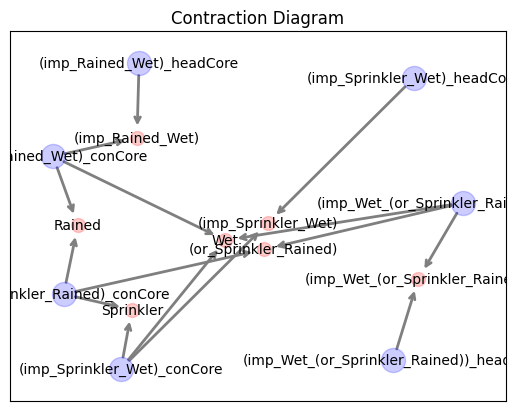

In [4]:
from tnreason import engine

cores = knowledgeBase.create_cores()


engine.draw_contractionDiagram(cores)

We can now infer the represented distribution. For example, we can calculate that "Rained" is entailed when knowing that "Wet" holds and "Sprinkler" is false.

In [5]:
inferer = knowledge.InferenceProvider(knowledgeBase)

In [6]:
inferer.ask_constraint(["Rained"])

'contingent'

In [7]:
inferer.ask(["Rained"],evidenceDict={"Wet":True, "Sprinkler":False})    #we implied previously that if the WET is true then RAINED or SPRINKLER is true (but as of now SPRINKLER is false)

1.0

What is the probability, that it had Rained, given that the street is wet?

In [8]:
inferer.ask(["Rained"],evidenceDict={"Wet":True})   #we implied previously that if the WET is true then RAINED or SPRINKLER is true

0.6666666666666666

Adding the information that the sprinkler was makes the event rained less likely. This is a typical explaining away phenomenon.

In [9]:
inferer.ask(["Rained"],evidenceDict={"Wet":True, "Sprinkler":True})

0.5

In [10]:
inferer.ask(["Rained"],evidenceDict={"Wet":True, "Sprinkler":False})

1.0

We can decompose the sentences graphically. Such decompositions are exploited by tnreason for efficient representations.

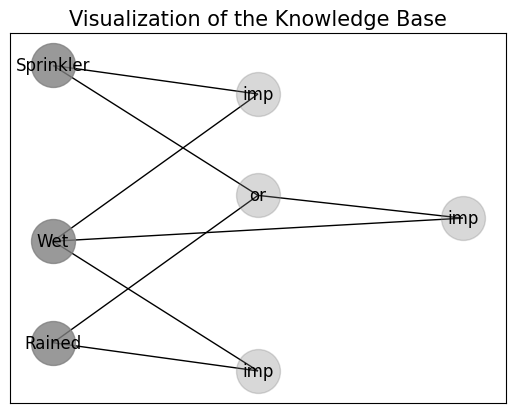

In [11]:
knowledge.visualize(knowledgeBase)

# Probabilistic Extensions

Let us model the situation, that the sprinkler not always hits the street. Thus, the street might not be wet although the sprinkler was on.

In [12]:
probKB = knowledge.HybridKnowledgeBase(
    facts = {"s1":sen1, "s3": sen3},
    weightedFormulas = {"s2": sen2+[10]}
)
probInferer = knowledge.InferenceProvider(probKB)

The first rule is still always satisfied. Since the second is not a hard constraint, it does not always hold.

In [13]:
probInferer.ask(["imp","Rained","Wet"])

1.0

In [14]:
probInferer.ask(["imp","Sprinkler","Wet"])

0.99998865014638

We can also investigate the full probability distribution.

In [15]:
probInferer.exact_map_query(["Rained","Sprinkler","Wet"],evidenceDict={"Wet":1})

{'Rained': 0, 'Sprinkler': 1, 'Wet': 1}

# Generate Sample Data

In [16]:
sampleData = probInferer.draw_samples(100)
sampleData

C:\Users\ipobo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tnreason\knowledge\deductive.py:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sampleDf = pd.concat(


,Wet,Rained,Sprinkler
0,0,0,0
1,0,0,0
2,1,1,1
3,1,1,0
4,1,1,0
...,...,...,...
95,1,1,1
96,0,0,0
97,1,0,1
98,1,0,1
